In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/mshsu/data403-project1/main/client_b", low_memory=False)

In [ ]:
data.dtypes

Date              object
Month              int64
DayOfWeek          int64
StoreName         object
Zipcode            int64
City              object
County            object
category_name     object
sale_liters      float64
sale_dollars     float64
NearHoliday        int64
CostPerLiter     float64
Category          object
CategoryNum        int64
Student Pop      float64
Institution      float64
Size              object
Sale Amount       object
dtype: object

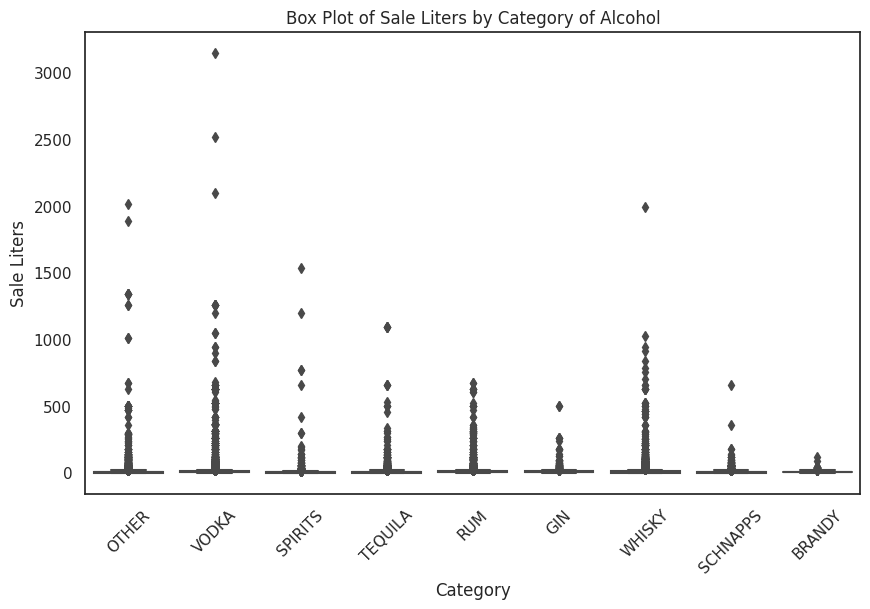

In [ ]:
sns.set(style="white")

plt.figure(figsize=(10, 6))
sns.boxplot(x="Category", y="sale_liters", data=data)
plt.xticks(rotation=45)
plt.xlabel("Category")
plt.ylabel("Sale Liters")
plt.title("Box Plot of Sale Liters by Category of Alcohol")

plt.show()

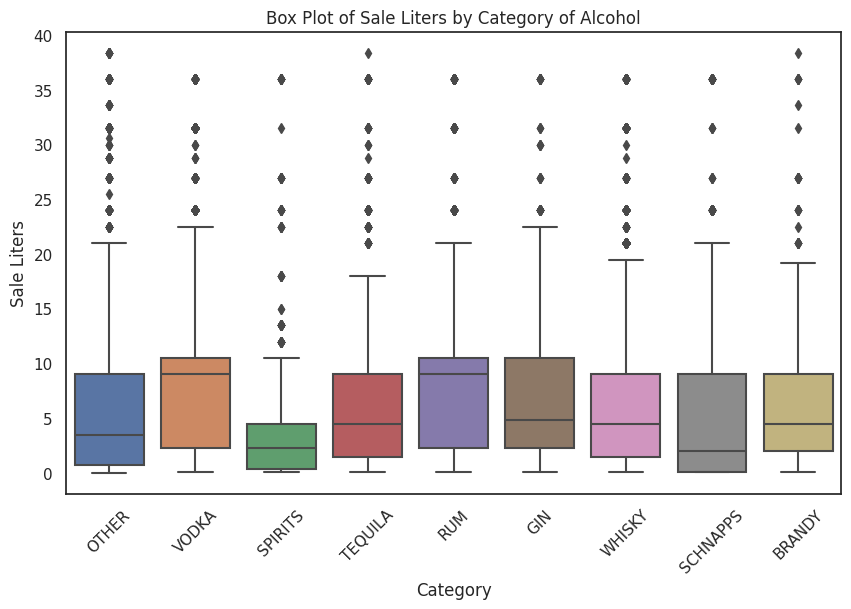

In [ ]:
sns.set(style="white")

plt.figure(figsize=(10, 6))
sns.boxplot(x="Category", y="sale_liters", data=data[data["sale_liters"] <= 40])
plt.xticks(rotation=45)
plt.xlabel("Category")
plt.ylabel("Sale Liters")
plt.title("Box Plot of Sale Liters by Category of Alcohol")

plt.show()

In [ ]:
# I ran api multiple times and barely saw any 0's and 6's (this run actually had the most 6's I saw)
data["DayOfWeek"].value_counts()

2    24275
4    20769
5    19965
3    17169
6     9701
1     7927
0        7
Name: DayOfWeek, dtype: int64

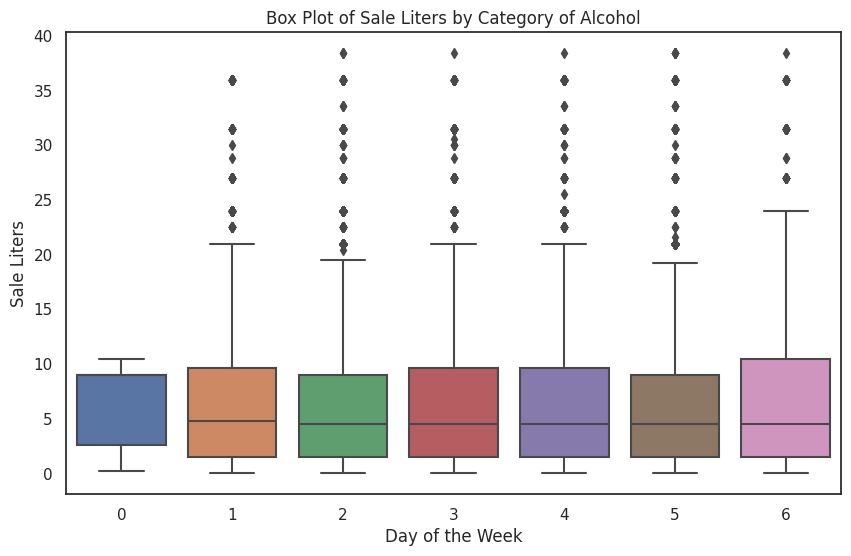

In [ ]:
# date_extract_dow() - 0 = Sunday, 6 = Saturday
sns.set(style="white")

plt.figure(figsize=(10, 6))
sns.boxplot(x="DayOfWeek", y="sale_liters", data=data[data["sale_liters"] <= 40])
plt.xlabel("Day of the Week")
plt.ylabel("Sale Liters")
plt.title("Box Plot of Sale Liters by Category of Alcohol")

plt.show()

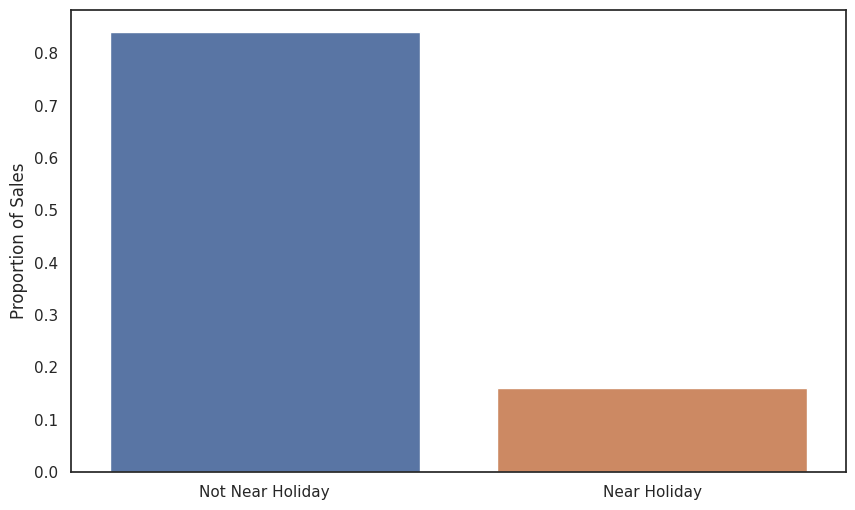

In [ ]:
# change to proportion of sales of small/large amounts of alc
props = data['NearHoliday'].value_counts(normalize=True)

sns.set(style="white")

plt.figure(figsize=(10, 6))
sns.barplot(x=["Not Near Holiday", "Near Holiday"], y=props)
plt.ylabel("Proportion of Sales")
# plt.title("")

plt.show()

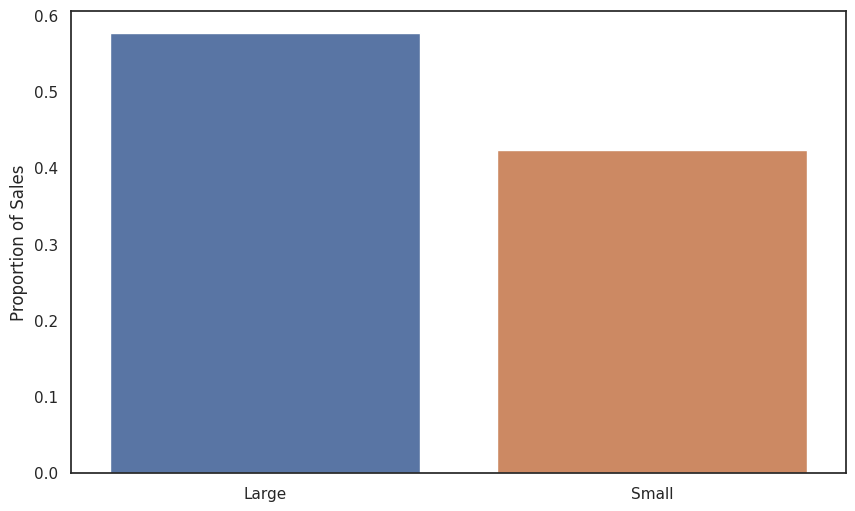

In [ ]:
props = data['Sale Amount'].value_counts(normalize=True)

sns.set(style="white")

plt.figure(figsize=(10, 6))
sns.barplot(x=props.index, y=props)
plt.ylabel("Proportion of Sales")
# plt.title("")

plt.show()

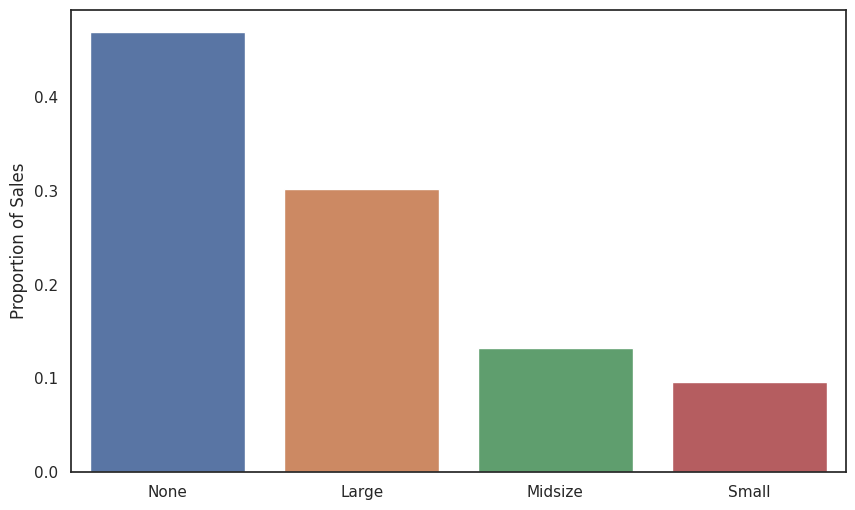

In [ ]:
# change to proportion of sales of small/large amounts of alc
# if ^, flip so amount of alc sold is on x and stacked barplot for each size?
props = data['Size'].value_counts(normalize=True)

sns.set(style="white")

plt.figure(figsize=(10, 6))
sns.barplot(x=props.index, y=props)
plt.ylabel("Proportion of Sales")
# plt.title("")

plt.show()

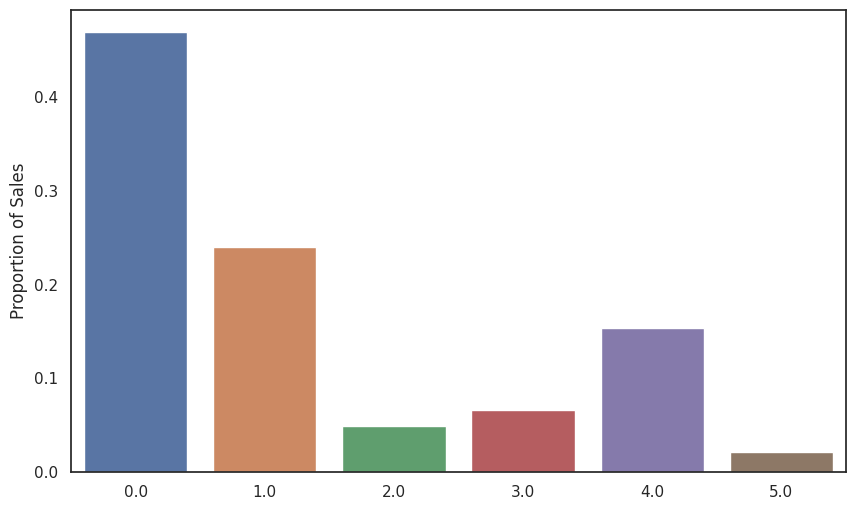

In [ ]:
props = data['Institution'].value_counts(normalize=True)

sns.set(style="white")

plt.figure(figsize=(10, 6))
sns.barplot(x=props.index, y=props)
plt.ylabel("Proportion of Sales")
# plt.title("")

plt.show()

<Axes: xlabel='Institution'>

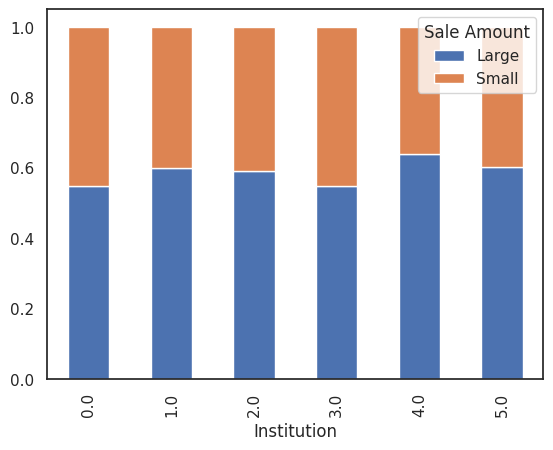

In [ ]:
props = data.groupby(['Institution', 'Sale Amount']).size().unstack().fillna(0)
props = props.div(props.sum(axis=1), axis=0)
props.plot(kind='bar', stacked=True)

<Axes: xlabel='Category'>

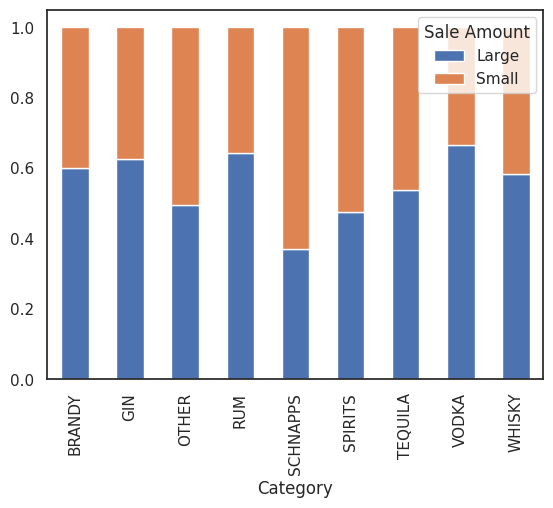

In [ ]:
props = data.groupby(['Category', 'Sale Amount']).size().unstack().fillna(0)
props = props.div(props.sum(axis=1), axis=0)
props.plot(kind='bar', stacked=True)

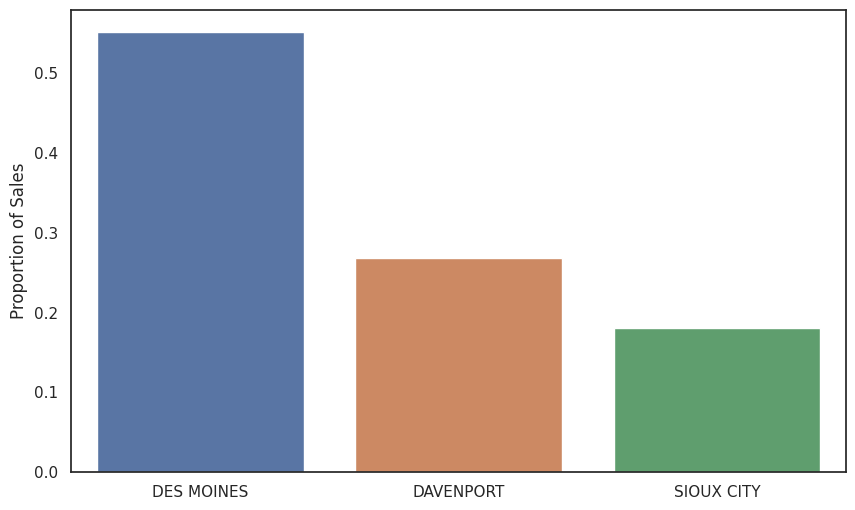

In [ ]:
props = data[data["Institution"] == 4]['City'].value_counts(normalize=True)

sns.set(style="white")

plt.figure(figsize=(10, 6))
sns.barplot(x=props.index, y=props)
plt.ylabel("Proportion of Sales")
# plt.title("")

plt.show()

<Axes: xlabel='City'>

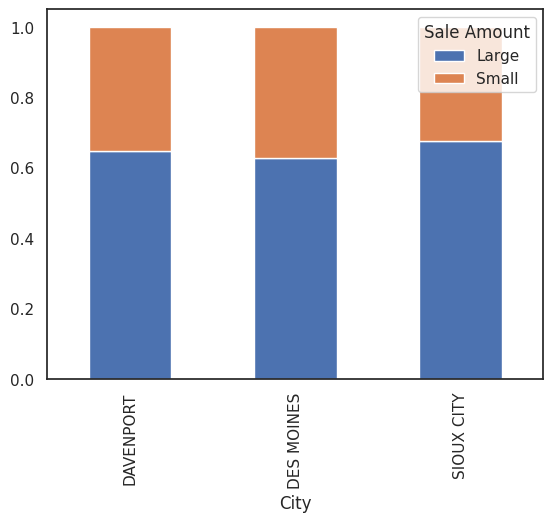

In [ ]:
props = data[data["Institution"] == 4].groupby(['City', 'Sale Amount']).size().unstack().fillna(0)
props = props.div(props.sum(axis=1), axis=0)
props.plot(kind='bar', stacked=True)

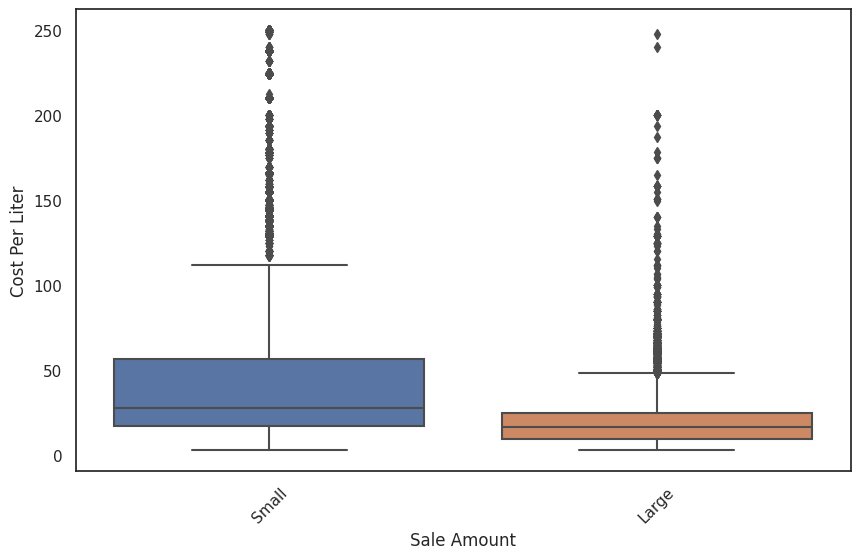

In [ ]:
# cost per liter by small v large amounts of alc sold?
sns.set(style="white")

plt.figure(figsize=(10, 6))
sns.boxplot(x="Sale Amount", y="CostPerLiter", data=data[data["CostPerLiter"] <= 250])
plt.xticks(rotation=45)
plt.xlabel("Sale Amount")
plt.ylabel("Cost Per Liter")
# plt.title("Box Plot of Sale Liters by Category of Alcohol")

plt.show()

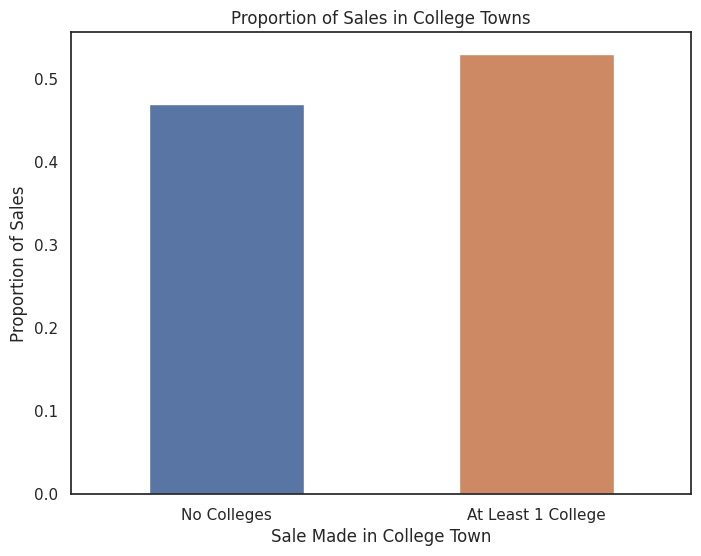

In [ ]:
city_with_college = data['Institution'].apply(lambda x: 1 if x >= 1 else 0)
props = city_with_college.value_counts(normalize=True)

sns.set(style="white")

plt.figure(figsize=(8,6))
sns.barplot(x=props.index, y=props, width=.5)
plt.xlabel("Sale Made in College Town")
plt.ylabel("Proportion of Sales")
plt.xticks([0, 1], ['No Colleges', 'At Least 1 College'])
plt.title("Proportion of Sales in College Towns")

plt.show()